In [248]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge
import warnings

warnings.filterwarnings('ignore')
plt.style.use('dark_background')

In [249]:
# Theoretical function
def f(x):
    return 0.6 - 13.2 * x - 5.3 * x ** 2 - 4.17 * x ** 3

In [250]:
# Prepare data
X = np.linspace(-10, 10, 100)
y = f(X)

In [251]:
# Dataset with noise (train)
np.random.seed(16)
x_train = np.random.uniform(-10, 10, 10)
x_train = np.sort(x_train)
y_train = f(x_train) + np.random.uniform(-1000, 1000, 10)

X_train = x_train.reshape(-1, 1)

In [252]:
# Dataset with noise (test)
np.random.seed(8)

x_test = np.random.uniform(-10, 10, 10)
x_test = np.sort(x_test)
y_test = f(x_test)

X_test = x_test.reshape(-1, 1)

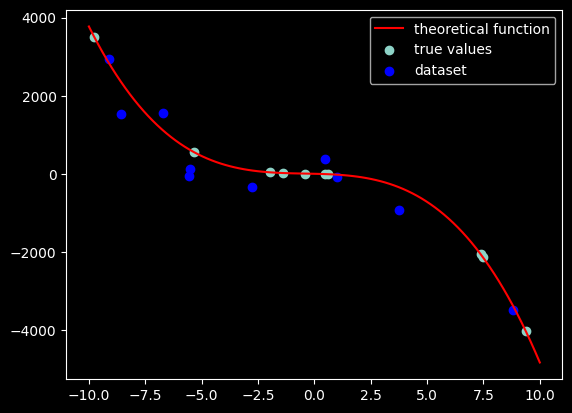

In [253]:
plt.figure(2)
plt.plot(X, f(X), label='theoretical function', c='r')
plt.scatter(x_test, y_test, label='true values')
plt.scatter(x_train, y_train, label='dataset', c='b')
plt.legend()
plt.show()

In [254]:
# Model & learning
pipe = make_pipeline(PolynomialFeatures(8, include_bias=False), StandardScaler())
pipe.fit(X_train)
pipe

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=8, include_bias=False)),
                ('standardscaler', StandardScaler())])

In [255]:
X_train # dataset before transform

array([[-9.087961  ],
       [-8.59350266],
       [-6.7253715 ],
       [-5.53838117],
       [-5.53417842],
       [-2.78542329],
       [ 0.46326683],
       [ 1.01402913],
       [ 3.77452324],
       [ 8.8202172 ]])

In [256]:
# transform dataset
# 1) polynomial 8 => for every 'x' 8 weights => 10 x 8 = 80 weights
# 2) standardization (x - mean) / sd
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

print(X_train.shape)
X_train

(10, 8)


array([[-1.20654669,  1.51744186, -1.64496583,  1.74983108, -1.85429383,
         1.88816326, -1.9910769 ,  2.00103389],
       [-1.11708569,  1.23022045, -1.33711025,  1.22610397, -1.33572119,
         1.13800378, -1.27047341,  1.03123015],
       [-0.77908978,  0.29005755, -0.45995524, -0.07880519, -0.20073465,
        -0.31059278, -0.03751685, -0.44504809],
       [-0.56433084, -0.18817536, -0.10340913, -0.50191013,  0.09231292,
        -0.6079354 ,  0.16336413, -0.63568187],
       [-0.56357045, -0.18970416, -0.10238325, -0.50300247,  0.09298971,
        -0.60854786,  0.16373208, -0.63599148],
       [-0.06624564, -0.94099394,  0.2901991 , -0.83914187,  0.26521034,
        -0.74052583,  0.23222532, -0.68660971],
       [ 0.52153104, -1.18883238,  0.34783241, -0.8621745 ,  0.2709593 ,
        -0.74270675,  0.23279036, -0.68681902],
       [ 0.62117897, -1.16210228,  0.35033642, -0.86178727,  0.27099533,
        -0.74270172,  0.23279084, -0.68681896],
       [ 1.12062768, -0.72783214

In [257]:
# alphas - lambda coefficients from L2
alphas = list(np.logspace(-7, 4, 100))
models = []
coefs = []

alphas

[1e-07,
 1.2915496650148827e-07,
 1.668100537200059e-07,
 2.1544346900318822e-07,
 2.782559402207126e-07,
 3.5938136638046254e-07,
 4.641588833612782e-07,
 5.994842503189409e-07,
 7.742636826811278e-07,
 1e-06,
 1.2915496650148827e-06,
 1.6681005372000591e-06,
 2.1544346900318822e-06,
 2.782559402207126e-06,
 3.5938136638046257e-06,
 4.641588833612773e-06,
 5.994842503189409e-06,
 7.742636826811277e-06,
 1e-05,
 1.2915496650148827e-05,
 1.6681005372000593e-05,
 2.1544346900318823e-05,
 2.782559402207126e-05,
 3.5938136638046256e-05,
 4.641588833612772e-05,
 5.994842503189409e-05,
 7.742636826811278e-05,
 0.0001,
 0.00012915496650148828,
 0.00016681005372000575,
 0.00021544346900318823,
 0.0002782559402207123,
 0.00035938136638046257,
 0.00046415888336127773,
 0.0005994842503189409,
 0.000774263682681127,
 0.001,
 0.0012915496650148827,
 0.0016681005372000592,
 0.002154434690031882,
 0.0027825594022071257,
 0.003593813663804626,
 0.004641588833612773,
 0.005994842503189409,
 0.007742636

In [258]:
for alpha in alphas:
    model_ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    # list of models
    models.append(model_ridge)

    # list of coefficients
    coefs.append(model_ridge.coef_)

models.append(LinearRegression().fit(X_train, y_train))

In [259]:
len(models)

101

In [260]:
len(coefs)

100

In [261]:
coefs[0].size

8

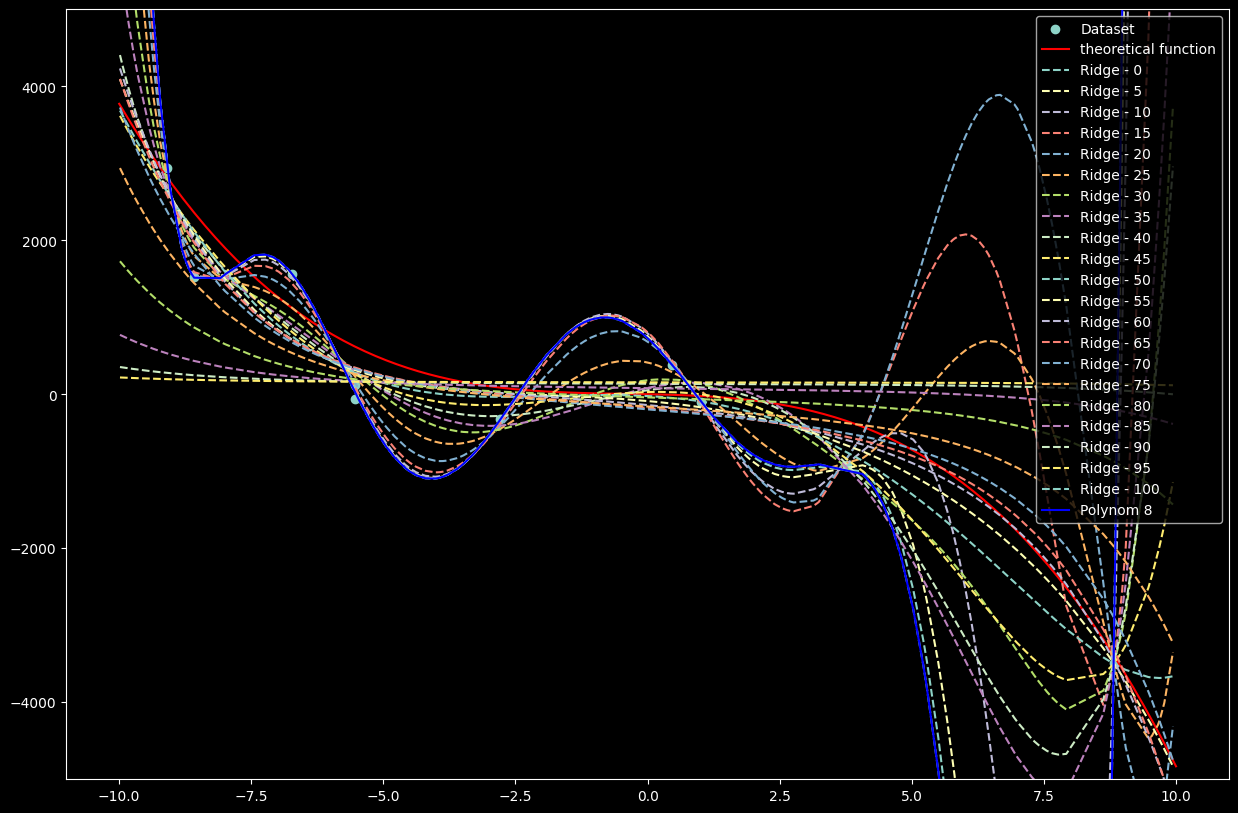

In [262]:
# Visualization of predicts
plt.figure(3, figsize=(15, 10))
plt.scatter(x_train, y_train, label='Dataset')
plt.plot(X, y, c='r', label='theoretical function')

x_t = np.sort(np.random.uniform(-10, 10, 200)).reshape(-1, 1)
X_t = pipe.transform(x_t)

for i, model in enumerate(models):
    if i % 5 == 0:
        plt.plot(x_t, model.predict(X_t), '--', label=f'Ridge - {i}')

plt.plot(x_t, models[-1].predict(X_t), 'b-', label='Polynom 8')
plt.ylim(-5000, 5000)
plt.legend()
plt.show()

In [263]:
import pandas as pd

In [264]:
scores = pd.DataFrame()
cores = scores.append(
    {
        'alpha': 'no',
        'train_r2': models[-1].score(X_train, y_train),
        'test_r2': models[-1].score(X_test, y_test)
    }, ignore_index=True
)

for i, m in enumerate(models[:-1]):
    alpha = alphas[i]
    scores = scores.append(
        {
            'alpha': alpha,
            'train_r2': m.score(X_train, y_train),
            'test_r2': m.score(X_test, y_test)
        }, ignore_index=True
    )

scores

,alpha,train_r2,test_r2
0,1.000000e-07,0.999329,-56.020863
1,1.291550e-07,0.999326,-54.203885
2,1.668101e-07,0.999323,-51.961321
3,2.154435e-07,0.999316,-49.228040
4,2.782559e-07,0.999307,-45.948942
...,...,...,...
95,3.593814e+03,0.019553,-0.068297
96,4.641589e+03,0.015197,-0.073450
97,5.994843e+03,0.011801,-0.077468
98,7.742637e+03,0.009159,-0.080594


In [265]:
np.vstack(coefs).T

array([[-3.47040226e+03, -3.47465247e+03, -3.47988309e+03,
        -3.48622606e+03, -3.49376817e+03, -3.50250028e+03,
        -3.51224183e+03, -3.52253699e+03, -3.53252434e+03,
        -3.54079073e+03, -3.54523188e+03, -3.54295302e+03,
        -3.53024546e+03, -3.50266645e+03, -3.45523075e+03,
        -3.38270376e+03, -3.27998025e+03, -3.14254136e+03,
        -2.96699286e+03, -2.75167766e+03, -2.49730931e+03,
        -2.20750024e+03, -1.88899470e+03, -1.55141756e+03,
        -1.20645361e+03, -8.66560313e+02, -5.43505060e+02,
        -2.47097880e+02,  1.55866608e+01,  2.40393949e+02,
         4.25771327e+02,  5.72154854e+02,  6.81282982e+02,
         7.55605160e+02,  7.97876294e+02,  8.10959482e+02,
         7.97809278e+02,  7.61573354e+02,  7.05728383e+02,
         6.34159517e+02,  5.51110646e+02,  4.60979014e+02,
         3.67991570e+02,  2.75853973e+02,  1.87478167e+02,
         1.04862934e+02,  2.91429063e+01, -3.92338866e+01,
        -1.00269640e+02, -1.54191481e+02, -2.01286597e+0

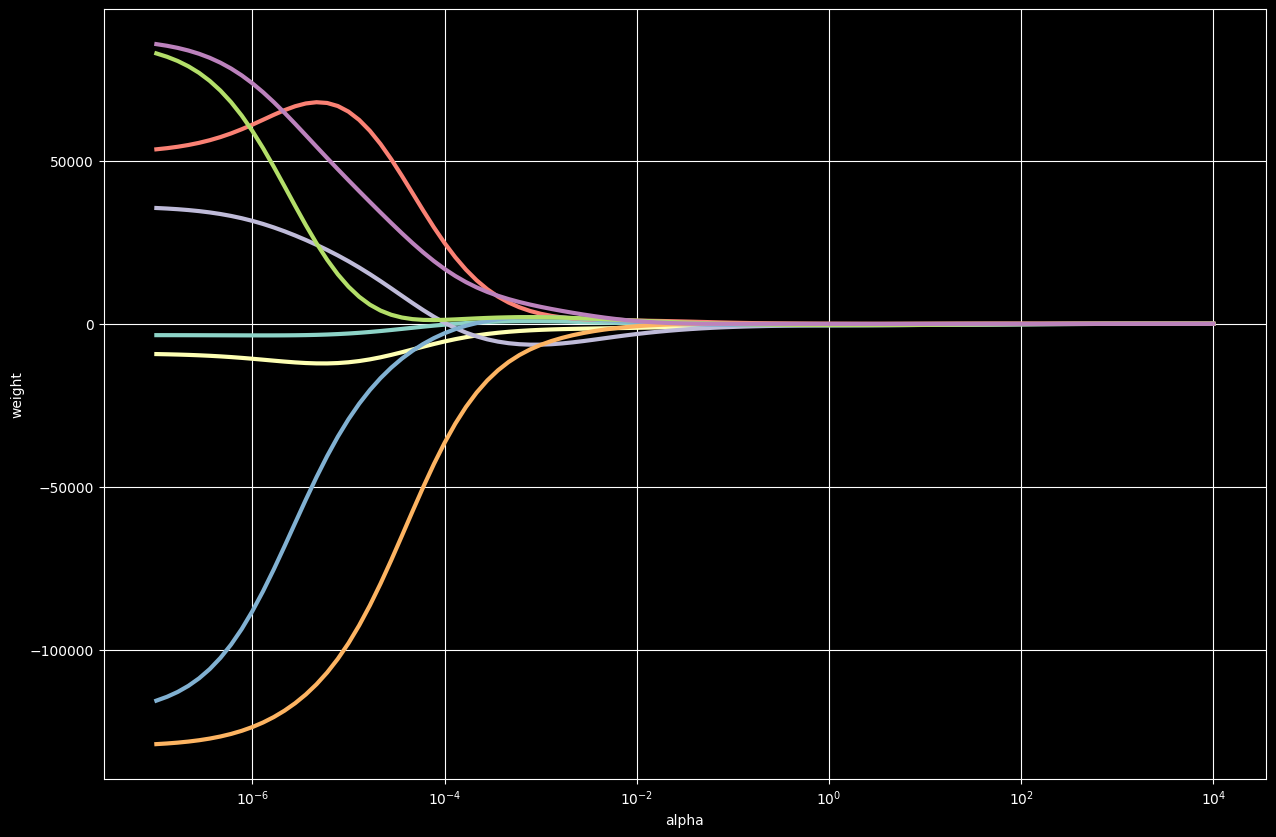

In [266]:
plt.figure(figsize=(15, 10))

for i in np.vstack(coefs).T:
    plt.plot(alphas, i, linewidth=3)

plt.grid()
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('weight')
plt.show()